In [1]:
using Gadfly
using DataFrames

In [2]:
function logBinomial(n,k)
    return lgamma(n+1)-lgamma(k+1)-lgamma(n-k+1)
end;

Bounds

In [3]:
function densBound(p,k,l;δ=0.5)
    return min(1,exp(logBinomial(n,k)+logBinomial(m,l)-2*k*l*(δ-p)^2))
end
function cohBound(k,l;δ=0.5)
    b = ceil(k*δ*(δ*l-1)/(l-1))
    b=max(0,b/n)
    prob1 = -3/2*n*max(0,b-p^2)^2/(1-p^2)/(2p^2+b)
    prob1 = m*(m-1)/2*exp(prob1)
    a = ceil(l*δ*(δ*k-1)/(k-1))
    a=max(0,a/m)
    prob2 = -3/2*m*max(0,a-p^2)^2/(1-p^2)/(2p^2+a)
    prob2 = n*(n-1)/2*exp(prob2)
    return min(1, prob2,prob1)
end;

# Comparison
Set dimensions $n$ and $m$, the noise probability $p$, error control level $q$ and minimum density parameter $\texttt{delta}$.

In [4]:
n=1000
m=800
p=0.1
q=0.01
delta=0.5;
#MovieLens 500k dim
#n=3015
#m=3329

Plot the minimum value of $y=\frac{|Y_{\cdot s}|}{m}$ against the value $x=\frac{|X_{\cdot s}|}{n}$ such that a $\delta$-dense tile is generated by noise with probability smaller than $q$.

In [5]:
function minlDens(p,x;ymax=0.2,d=0.5)
    range = collect(1/m:0.001:ymax)
    return range[indmax(map(y->densBound(p,x*n,y*m,δ=d)<q, range))]
end;
function minlcoh(p,x;ymax=0.2, d=0.5)
    range = collect(1/m:0.001:ymax)
    return range[indmax(map(y->cohBound(x*n,y*m,δ=d)<q, range))]
end;

n,m = 1000,800


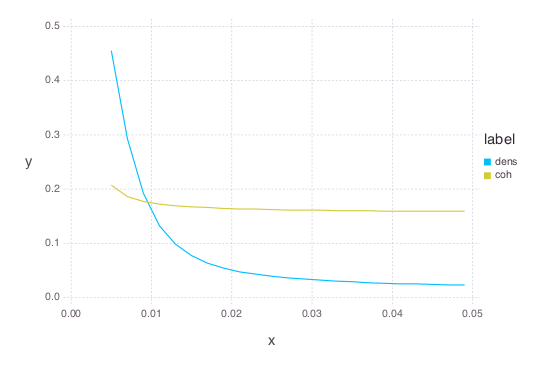

In [6]:
println("n,m = ",n,",",m)
xrange= 5/n:0.002:0.05
df1 = DataFrame(x=xrange, y=[minlDens(p,x,ymax=0.5, d=delta) for x in xrange], label="dens")
df2 = DataFrame(x=xrange, y=[minlcoh(p,x,ymax=0.5, d=delta) for x in xrange], label="coh")
df = vcat(df1, df2)

plot(df, x=:x, y=:y, color=:label, Geom.line)

Plot the values of the density and coherence bounds against the ratio $x=\frac{|X_{\cdot s}|}{n}=\frac{|Y_{\cdot s}|}{m}$. 

In [7]:
function l(x) 
    return m*x
end
function k(x) 
    return n*x
    end;

m=800, n=1000, p=0.1


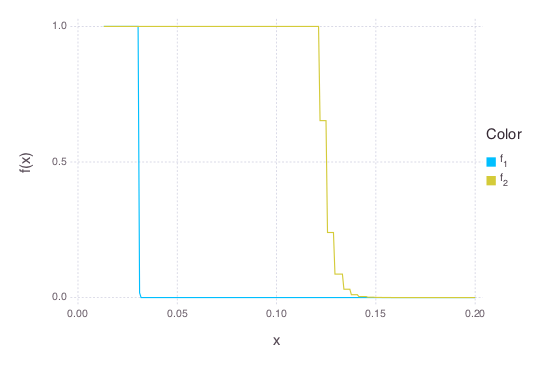

In [8]:
println("m=",m,", n=",n,", p=",p)
plot([x->densBound(p,l(x),k(x),δ=delta), #Density with Hoeffding
        #Coherence Bernstein
        x->cohBound(k(x),l(x),δ=delta),
        #Isometrie kinda Bernstein
        #x-> min(1, m*exp( -3/2*n*(m-1)*max(0, (k(x)*l(x)/4/(m-1)/n-p^2) )^2/(1-p^2)/(2p^2+k(x)*l(x)/4/(m-1)/n/3))),
        #Original + Isometrie 
        #x-> min(1, l(x)*exp(logBinomial(m,l(x))-3/2*n*(l(x)-1)*(max(0,k(x)/n/4-p^2)^2)/(2p^2+k(x)/4/n) ))
        ] , 0.013, 0.2)

In [9]:
println( n * ( (n-1)*(n-2)*(n-3) + 6*(n-2)*(n-1) + 7*(n-1) + 1 ) )

println( n^4 )

1000000000000
1000000000000
